In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd
import pickle
import gzip
import palettable
from tqdm import tqdm

### Sampling ablation

In [2]:
task = "supcon_hierar"
filepath = f"./result/uspto_1K_TPL_backward/final/{task}/log.txt"
with open(filepath) as f:
    lines = f.readlines()

In [3]:
import re
keyword = 'mAP@10'
pattern = re.compile(keyword)
results = [line for line in lines if pattern.search(line)]

In [4]:
mAP_ls = []
for res in results:
    mAP = eval(res.strip().split(":")[-1])
    mAP_ls.append(mAP)
mAP_ls

[0.05789,
 0.139071,
 0.181501,
 0.218318,
 0.246311,
 0.258126,
 0.279933,
 0.292481,
 0.295635,
 0.31554,
 0.327031,
 0.330069,
 0.338229,
 0.346282,
 0.364242,
 0.373213,
 0.389805,
 0.405711,
 0.419113,
 0.419074,
 0.443284,
 0.461744,
 0.471609,
 0.489182,
 0.50131,
 0.518856,
 0.515532,
 0.533417,
 0.529332,
 0.550512,
 0.534576,
 0.557463,
 0.567636,
 0.584937,
 0.585908,
 0.59781,
 0.617123,
 0.611717,
 0.615707,
 0.624125,
 0.63662,
 0.649079,
 0.658394,
 0.655328,
 0.669975,
 0.66685,
 0.679544,
 0.676846,
 0.684777,
 0.684009,
 0.69468,
 0.690599,
 0.692367,
 0.698404,
 0.705652,
 0.693233,
 0.693765,
 0.697881,
 0.70056,
 0.700022,
 0.69747,
 0.710088,
 0.717478,
 0.719993,
 0.734951,
 0.733384,
 0.739918,
 0.738904,
 0.73653,
 0.744448,
 0.750275,
 0.754988,
 0.754964,
 0.758537,
 0.747678,
 0.759157,
 0.763191,
 0.766503,
 0.766391,
 0.779832,
 0.769176,
 0.769818,
 0.769315,
 0.775674,
 0.777205,
 0.774717,
 0.778446,
 0.774648,
 0.765458,
 0.763857,
 0.758529,
 0.782927

In [5]:
task = "supcon_hierar_wo_sampling"
filepath = f"./result/uspto_1K_TPL_backward/final/{task}/log.txt"
with open(filepath) as f:
    lines = f.readlines()
results = [line for line in lines if pattern.search(line)]
random_sample_mAP_ls = []
for res in results:
    mAP = eval(res.strip().split(":")[-1])
    random_sample_mAP_ls.append(mAP)
random_sample_mAP_ls

[0.094061,
 0.123351,
 0.14767,
 0.17729,
 0.192698,
 0.207234,
 0.218404,
 0.232114,
 0.232081,
 0.239116,
 0.252853,
 0.254383,
 0.254957,
 0.249723,
 0.272555,
 0.273568,
 0.275549,
 0.286453,
 0.284326,
 0.282867,
 0.289306,
 0.29802,
 0.305184,
 0.314625,
 0.322565,
 0.321889,
 0.333327,
 0.338091,
 0.353957,
 0.363936,
 0.35533,
 0.365056,
 0.382074,
 0.396178,
 0.404671,
 0.409127,
 0.419351,
 0.432592,
 0.432255,
 0.437167,
 0.432077,
 0.449924,
 0.451495,
 0.457325,
 0.476589,
 0.471955,
 0.483809,
 0.474002,
 0.475874,
 0.499669,
 0.500984,
 0.478146,
 0.494044,
 0.516283,
 0.498162,
 0.516323,
 0.522376,
 0.534227,
 0.522324,
 0.538818,
 0.544474,
 0.542021,
 0.544054,
 0.551152,
 0.558937,
 0.545602,
 0.555978,
 0.572664,
 0.552824,
 0.565818,
 0.570728,
 0.596626,
 0.57655,
 0.591523,
 0.60524,
 0.598681,
 0.60051,
 0.596978,
 0.604125,
 0.613678,
 0.612767,
 0.613548,
 0.619044,
 0.620421,
 0.620012,
 0.640384,
 0.620497,
 0.632627,
 0.641442,
 0.642368,
 0.662102,
 0.637

In [6]:
task = "supcon_template"
filepath = f"./result/uspto_1K_TPL_backward/final/{task}/log.txt"
with open(filepath) as f:
    lines = f.readlines()
results = [line for line in lines if pattern.search(line)]
template_mAP_ls = []
for res in results:
    mAP = eval(res.strip().split(":")[-1])
    template_mAP_ls.append(mAP)
template_mAP_ls

[0.073696,
 0.111822,
 0.121105,
 0.139767,
 0.16159,
 0.180118,
 0.199476,
 0.218425,
 0.227192,
 0.252437,
 0.253908,
 0.269742,
 0.278174,
 0.288915,
 0.296107,
 0.313009,
 0.321338,
 0.343736,
 0.352378,
 0.372598,
 0.363278,
 0.392395,
 0.404223,
 0.41749,
 0.430012,
 0.439878,
 0.450608,
 0.461969,
 0.461778,
 0.482094,
 0.495008,
 0.510153,
 0.509834,
 0.533562,
 0.546123,
 0.546427,
 0.557253,
 0.574718,
 0.57774,
 0.585057,
 0.577437,
 0.596582,
 0.59524,
 0.605881,
 0.61867,
 0.617458,
 0.628984,
 0.639041,
 0.629405,
 0.650072,
 0.652662,
 0.654492,
 0.657288,
 0.653298,
 0.672662,
 0.672995,
 0.682131,
 0.686137,
 0.673311,
 0.677328,
 0.680144,
 0.679775,
 0.702943,
 0.696447,
 0.709858,
 0.701857,
 0.706678,
 0.706923,
 0.714841,
 0.718694,
 0.720046,
 0.723459,
 0.724368,
 0.736731,
 0.736848,
 0.735761,
 0.742478,
 0.736392,
 0.747954,
 0.73976,
 0.737236,
 0.737329,
 0.751869,
 0.746928,
 0.763228,
 0.744204,
 0.757367,
 0.767328,
 0.761939,
 0.764818,
 0.776816,
 0.77

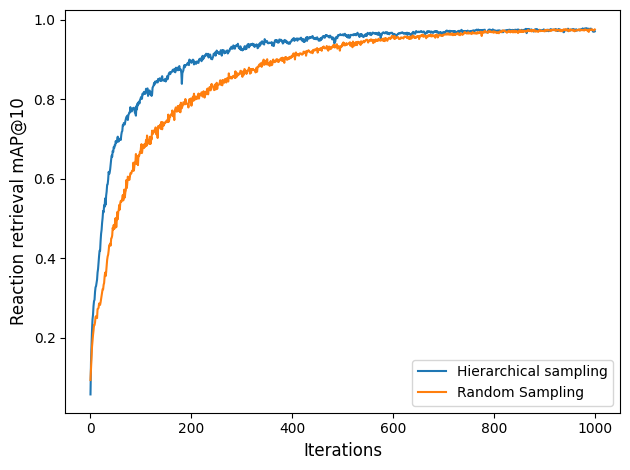

In [192]:
# plt.figure(figsize=(5, 4))
# plt.rc('font',family='sans-serif', size=15)
# plt.plot(mAP_ls, label="Hierar_sample")
# plt.plot(random_sample_mAP_ls, label="Random_sample")
# plt.legend()
# plt.xlabel("Iterations")
# plt.ylabel("Reaction retrieval mAP@10")

plt.style.use('default')
plt.rcParams.update({"font.size":10, "font.family": "Arial", "font.weight":"normal"})
font = {"color": "black", "size": 12,  "family" : "Arial"}
fig, ax = plt.subplots()
ax.plot(mAP_ls, label="Hierarchical sampling")
ax.plot(random_sample_mAP_ls, label="Random Sampling")
ax.legend()
ax.set_xlabel("Iterations", fontdict=font)
ax.set_ylabel("Reaction retrieval mAP@10", fontdict=font)
plt.tight_layout()
fig.savefig("./figures/sampling_ablation.png", dpi=1000)

### Reaction classification

In [3]:
result = pd.read_excel("./result/hiclr_result.xlsx", sheet_name="classification", index_col=0)
result

,AP3,rxnfp,DRFP,RxnRep,HiCLR
datasize,,,,,
4,0.518,0.1918,0.2234,0.4488,0.6963
8,0.620,0.2480,0.2924,0.6419,0.7806
16,0.703,0.3054,0.3529,0.7788,0.8360
32,0.761,0.3593,0.4323,0.8444,0.8724
64,0.799,0.4086,0.5052,0.8786,0.8991
128,0.828,0.4427,0.5718,0.9005,0.9140


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


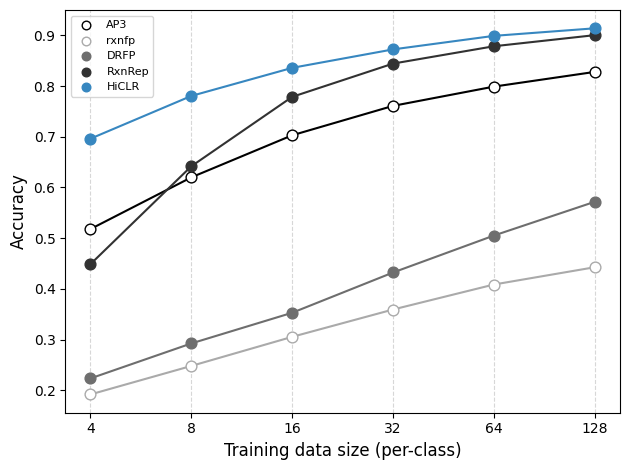

In [6]:
plt.style.use('default')

# cmap 
color_list = plt.cm.Blues_r(np.linspace(0, 1, 7))
# color_list = plt.get_cmap('Set3')(range(10))

x = range(1,7)
xticklables = [4,8,16,32,64,128]
models = result.columns

font = {"color": "black", "size": 12,  "family" : "Arial"}
fig, ax = plt.subplots()
ax.set_xlabel("Training data size (per-class)", fontdict=font)
ax.set_ylabel("Accuracy", fontdict=font)
ax.set_xticks(x)
ax.set_xticklabels(xticklables)
ax.xaxis.grid(ls="--", alpha=0.5, zorder=0)

ax.scatter(x, result[models[0]], label=models[0], edgecolors="black", c="white",zorder=100, s=60)
ax.plot(x, result[models[0]], c="black",zorder=50)

ax.scatter(x, result[models[1]], label=models[1], edgecolors=(170/255,170/255,170/255),c="white",zorder=100, s=60)
ax.plot(x, result[models[1]], color=(170/255,170/255,170/255),zorder=50)

ax.scatter(x, result[models[2]], label=models[2], color=(110/255,110/255,110/255),zorder=100, s=60)
ax.plot(x, result[models[2]], color=(110/255,110/255,110/255),zorder=50)

ax.scatter(x, result[models[3]], label=models[3], color=(50/255,50/255,50/255),zorder=100, s=60)
ax.plot(x, result[models[3]], color=(50/255,50/255,50/255),zorder=50)

ax.scatter(x, result[models[4]], label=models[4], c=color_list[2],zorder=100, s=60)
ax.plot(x, result[models[4]], c=color_list[2],zorder=50)
        
ax.legend(fontsize=8,markerscale=0.8)

plt.tight_layout()
fig.savefig("./figures/reaction_classification_v1.png", dpi=1000)

#### Per-class accuracy heatmap

In [1]:
import json
from sklearn import metrics

with open("./data/schneider_classification/label2rxnclass.json", "rb") as f:
    label2rxnclass = json.load(f)

with open("./data/schneider_classification/rxnclass2name.json", "rb") as f:
    rxnclass2name = json.load(f)

labels = label2rxnclass.values()

In [25]:
def labelled_cmat(confusion_matrix, labels,
                  figsize=(20,15), label_extras=None, 
                  dpi=1000,threshold=0.01, 
                  xlabel=True, ylabel=True, rotation=90):
    
    rowCounts = confusion_matrix.sum(axis=1)
    cmat_percent = confusion_matrix/rowCounts[:,None]
    #zero all elements that are less than 1% of the row contents
    ncm = cmat_percent*(cmat_percent>threshold)

    # fig = plt.figure(1,figsize=figsize,dpi=dpi)
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    fig.set_size_inches(figsize)
    # fig.set_dpi(dpi)

    # pax=ax.pcolor(ncm,cmap=cm.ocean_r)
    # pax=ax.pcolor(ncm,cmap='gist_earth_r')
    pax=ax.pcolor(ncm,cmap=palettable.lightbartlein.sequential.Blues7_6.mpl_colormap)
    ax.set_frame_on(True)

    # put the major ticks at the middle of each cell
    ax.set_yticks(np.arange(confusion_matrix.shape[0])+0.5, minor=False)
    ax.set_xticks(np.arange(confusion_matrix.shape[1])+0.5, minor=False)

    # want a more natural, table-like display
    ax.invert_yaxis()
    ax.xaxis.tick_top()

    if label_extras is not None:
        labels = [' {:s} {:s}'.format(x,label_extras[x].strip()) for x in labels]
    
    ax.set_xticklabels([], minor=False) 
    ax.set_yticklabels([], minor=False)

    if xlabel:
        ax.set_xticklabels(labels, minor=False, rotation=rotation, horizontalalignment='left') 
    if ylabel:
        ax.set_yticklabels(labels, minor=False)

    ax.set_ylabel("Ground Truth Labels", fontsize=15)
    ax.set_xlabel("Predicted Labels", fontsize=15)

    ax.grid(True)
    fig.colorbar(pax)
    fig.tight_layout()
    return fig

In [12]:
pred = pd.read_csv("./result/reaction_classification/schneider_fewshot/fix_encoder/final/tau0.1_coeff0.2_hmlc/train_4_per_class/prediction_1.csv")
pred

,y_true,y_pred
0,0,12
1,0,0
2,0,4
3,0,0
4,0,7
...,...,...
3897,45,45
3898,45,45
3899,45,45
3900,45,45


In [14]:
confusion_matrix = metrics.confusion_matrix(pred["y_true"], pred["y_pred"])
confusion_matrix

array([[69,  3,  1, ...,  0,  0,  0],
       [ 2, 38,  0, ...,  0,  1,  0],
       [ 0,  0, 59, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 74,  0,  1],
       [ 0,  0,  0, ...,  0, 71,  2],
       [ 0,  0,  0, ...,  0, 18, 52]])

In [16]:
class_acc_hiclr = np.diag(confusion_matrix / confusion_matrix.sum(1))
class_acc_hiclr

array([0.75824176, 0.44186047, 0.75641026, 0.4137931 , 0.43617021,
       0.79775281, 0.7032967 , 0.7       , 0.6091954 , 0.65      ,
       0.3375    , 0.24719101, 0.39175258, 0.89772727, 0.37037037,
       0.56756757, 0.94366197, 0.94736842, 0.18292683, 0.63541667,
       0.55670103, 0.86746988, 0.79347826, 1.        , 0.81927711,
       0.91428571, 0.88235294, 0.25555556, 0.49462366, 0.7804878 ,
       0.96470588, 0.85      , 0.93258427, 0.61728395, 0.86842105,
       0.62765957, 0.84210526, 0.91764706, 0.625     , 0.70786517,
       0.94623656, 0.78666667, 0.93333333, 0.89156627, 0.93421053,
       0.7027027 ])

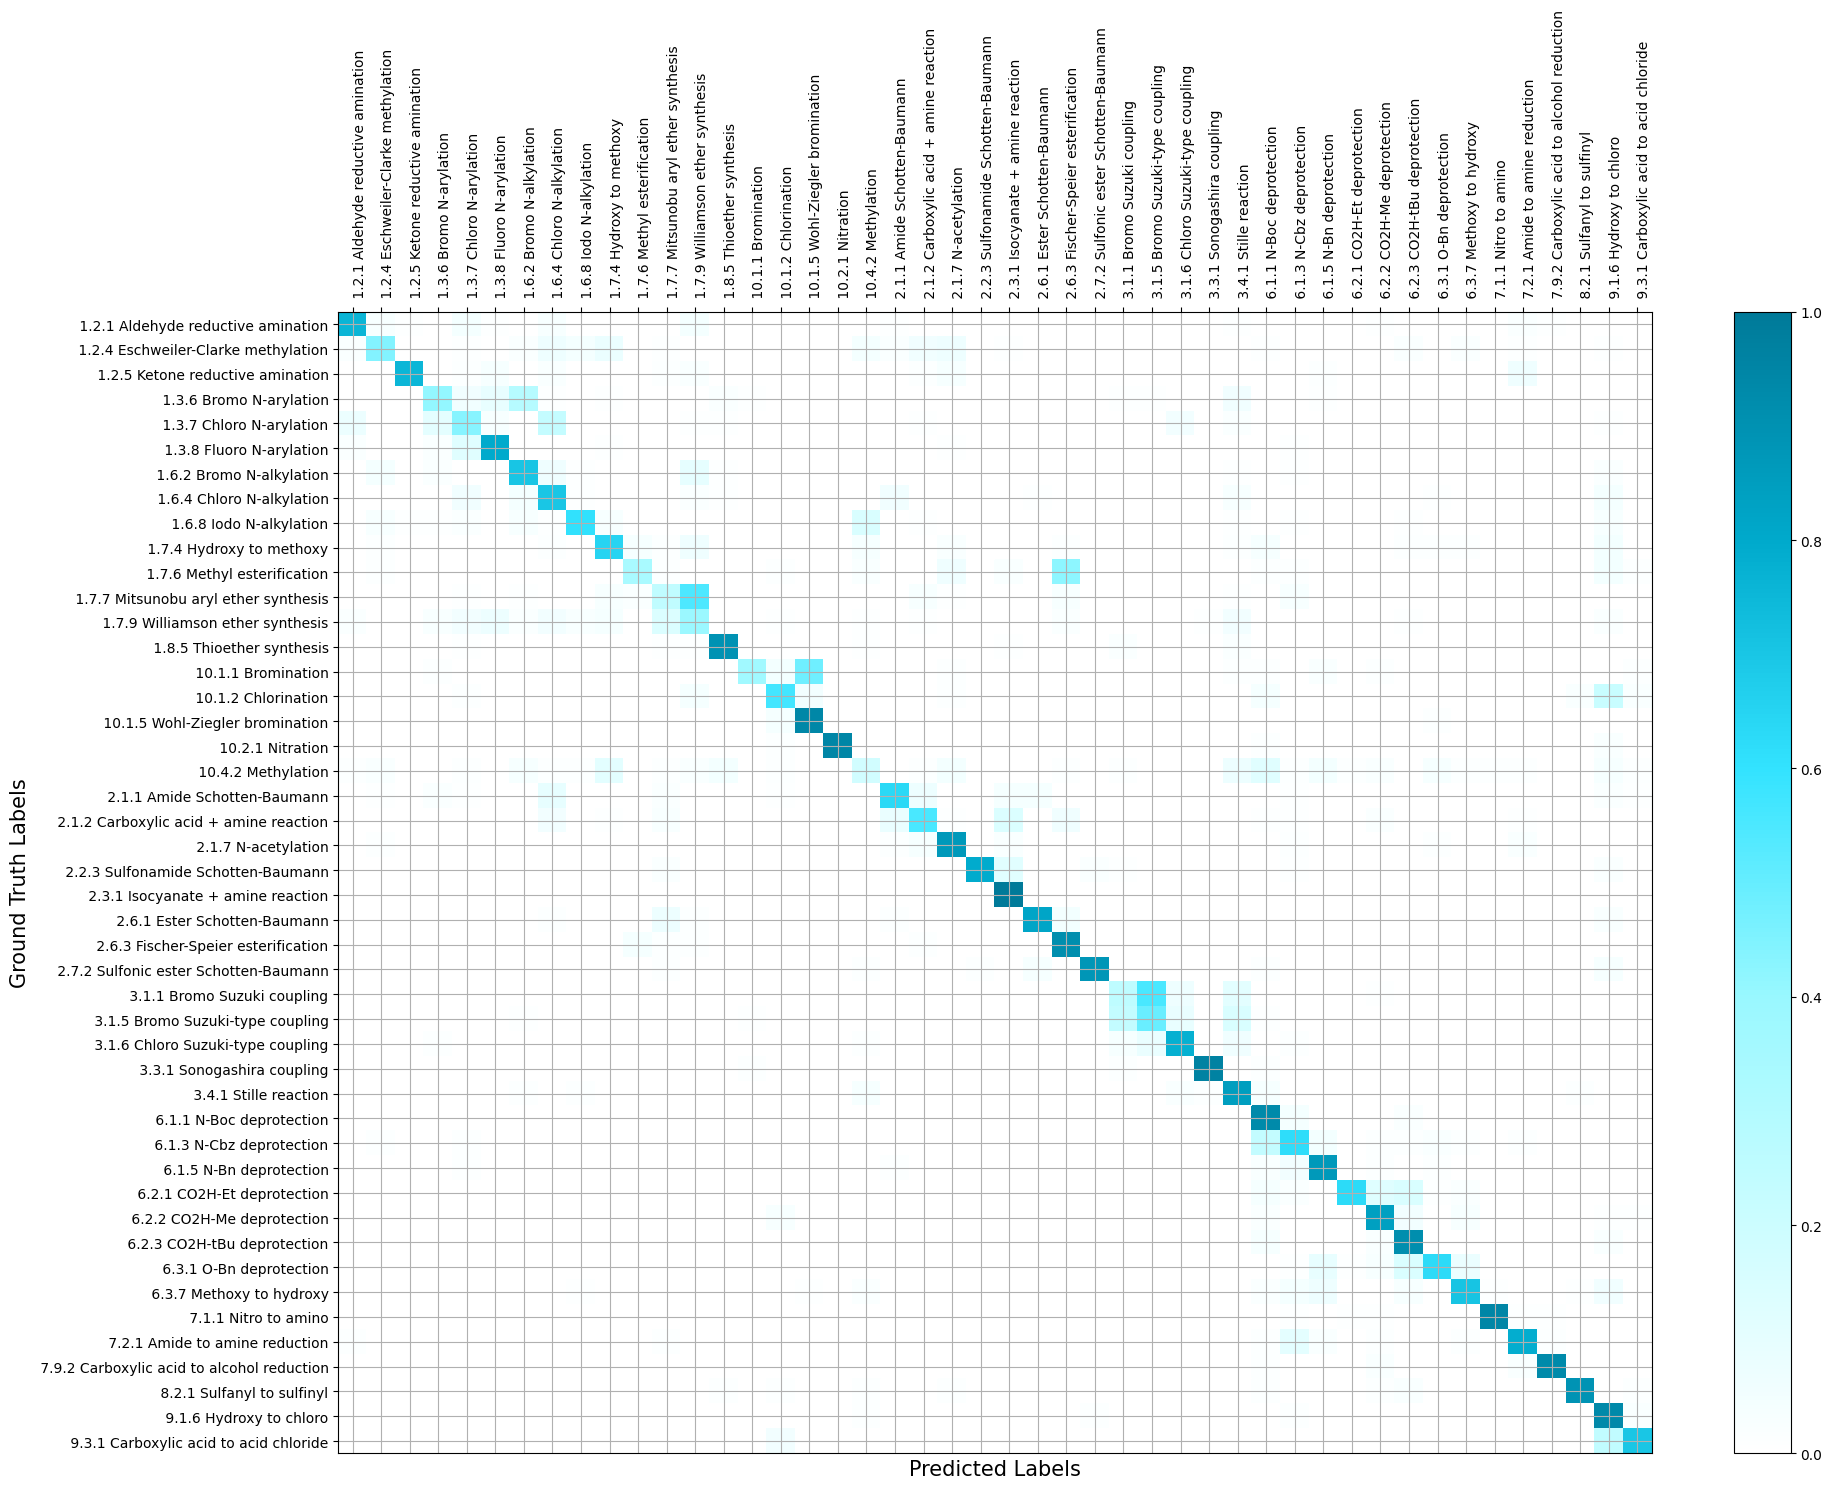

In [26]:
fig = labelled_cmat(confusion_matrix=confusion_matrix, labels=labels, label_extras=rxnclass2name)
fig.savefig("./figures/classification_confusion_matirx_hiclr_4samples.png", dpi=300)

In [27]:
pred = pd.read_csv("./result/reaction_classification/schneider_fewshot/fps_rxnrep/2023-09-12_16-56-13/train_4_per_class/prediction_1.csv")
confusion_matrix = metrics.confusion_matrix(pred["y_true"], pred["y_pred"])

In [28]:
class_acc_rxnrep = np.diag(confusion_matrix / confusion_matrix.sum(1))
class_acc_rxnrep

array([0.18681319, 0.47674419, 0.51282051, 0.29885057, 0.38297872,
       0.51685393, 0.30769231, 0.43333333, 0.48275862, 0.6375    ,
       0.2125    , 0.23595506, 0.21649485, 0.43181818, 0.54320988,
       0.44594595, 0.66197183, 0.43421053, 0.24390244, 0.34375   ,
       0.11340206, 0.27710843, 0.23913043, 0.37804878, 0.27710843,
       0.64285714, 0.43529412, 0.51111111, 0.11827957, 0.58536585,
       0.45882353, 0.7875    , 0.29213483, 0.19753086, 0.32894737,
       0.53191489, 0.51578947, 0.45882353, 0.40909091, 0.82022472,
       0.80645161, 0.57333333, 0.65333333, 0.89156627, 0.47368421,
       0.37837838])

In [29]:
(class_acc_rxnrep < class_acc_hiclr).sum()

40

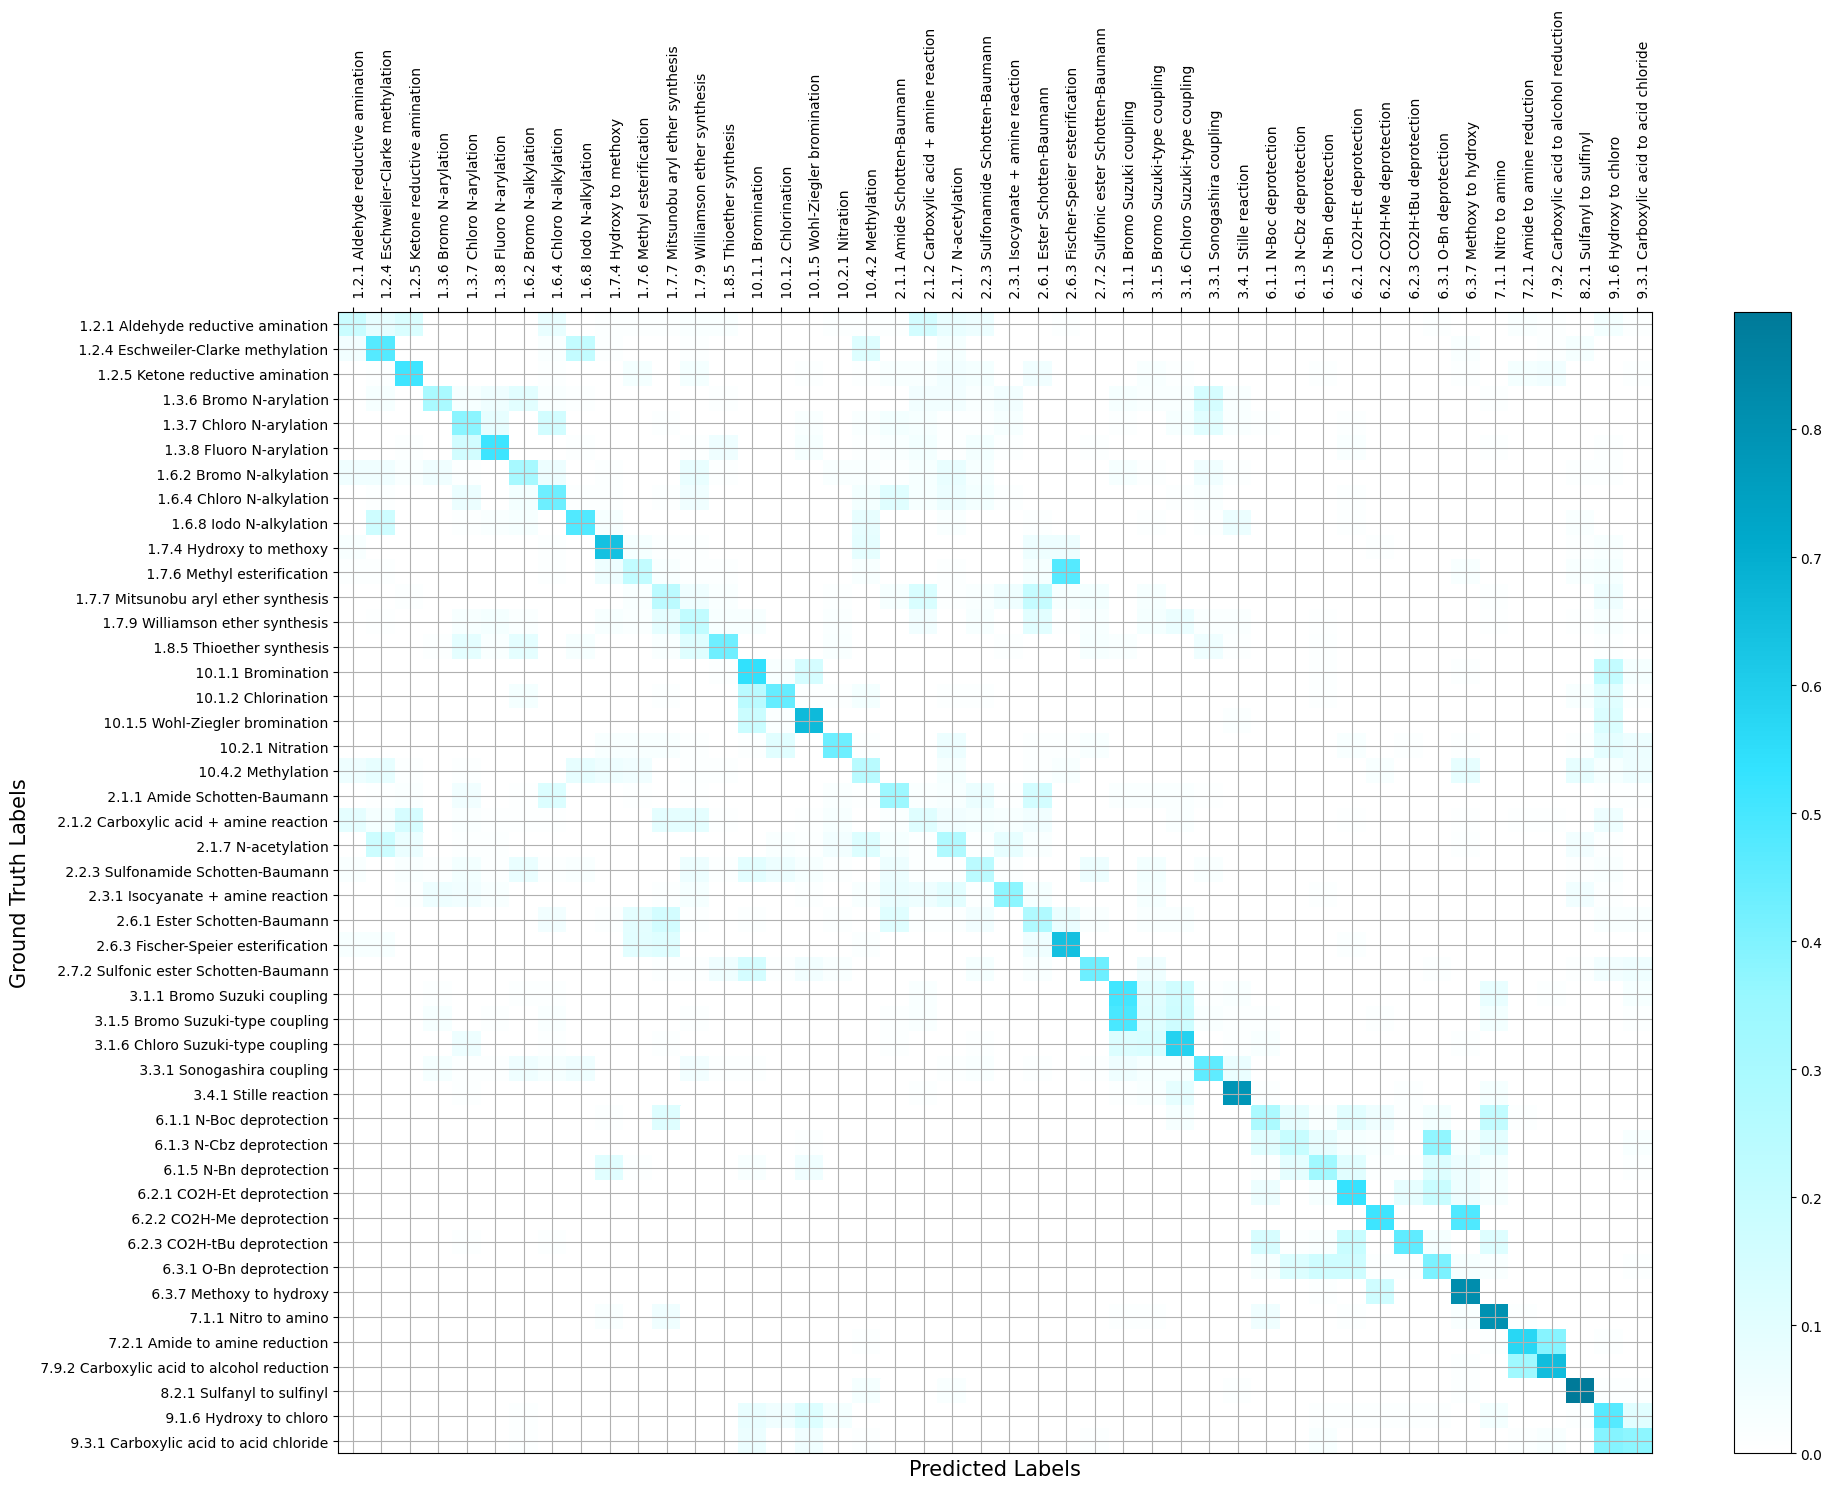

In [30]:
fig = labelled_cmat(confusion_matrix=confusion_matrix, labels=labels, label_extras=rxnclass2name)
fig.savefig("./figures/classification_confusion_matirx_rxnrep_4samples.png", dpi=300)

### Reaction condition prediction

In [32]:
result = pd.read_excel("./result/hiclr_result.xlsx", sheet_name="condition", index_col=0)
result

,Top-1,Top-3,Top-5,Top-10,Top-15
Models,,,,,
RCR,0.2596,0.3771,0.4206,0.4612,0.4717
Parrot-LM,0.2576,0.3893,0.4386,0.4813,0.4934
Parrot-RCM,0.2529,0.3841,0.4318,0.4728,0.4848
HiCLR (frozen-encoder),0.2666,0.3967,0.4422,0.4817,0.4940
HiCLR (full fine-tuning),0.2718,0.4081,0.4549,0.4951,0.5064
HiCLR (adapter-tuning),0.2762,0.4124,0.4594,0.4997,0.5115


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


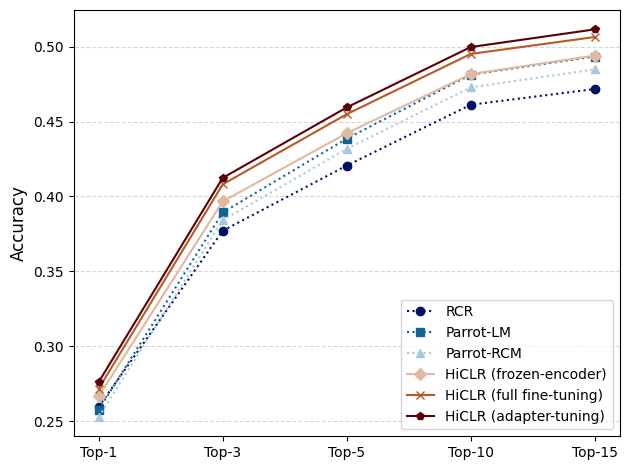

In [33]:
plt.style.use('default') # ["bmh", "ggplot"]

x = list(range(1,6))
xticklabels = result.columns
labels = result.index
colors = palettable.scientific.diverging.Vik_6.mpl_colors
markers = ["o", "s", "^", "D", "x", "p"]
lines = [":", ":", ":", "-", "-", "-"]
# colors = palettable.colorbrewer.qualitative.Set3_6.mpl_colors
# colors = palettable.cartocolors.qualitative.Prism_6.mpl_colors


font1 = {"color": "black", "size": 12,  "family" : "Arial"}
font2 = {"color": "black", "size": 10,  "family" : "Arial"}
fig, ax = plt.subplots()

for i in range(6):
    ax.plot(x, result.iloc[i, :].tolist(), label=labels[i], color=colors[i], marker=markers[i], ls=lines[i])

# ax.plot(x, parrot_lm, label="Parrot-LM", marker="^", color=(230/255, 111/255, 81/255))
# ax.plot(x, parrot_rcm, label="Parrot-RCM", marker="^", color=(230/255, 111/255, 81/255))
# ax.plot(x, hiclr, label="HiCLR", marker="D", color=(42/255, 157/255, 142/255))

legend = ax.legend(fontsize=10, loc="lower right")
legend.get_frame().set_facecolor('white') 
# ax.set_xlabel("Top-K reaction condition", fontdict=font1)
ax.set_ylabel("Accuracy", fontdict=font1)
ax.set_xticks(x)
ax.set_xticklabels(xticklabels)
ax.tick_params(
               labelsize=10, 
               color='black',   
               labelcolor='black',
               direction='out' 
               ) 
ax.yaxis.grid(True, ls="--", alpha=0.5)
plt.tight_layout()
fig.savefig("./figures/condition_prediction_v1.png", dpi=1000)

### Yield prediction

In [34]:
def plot_actual_vs_predicted(model_results,key,alpha):
    y_true = model_results['y_true'].values
    y_pred = model_results['y_pred'].values

    plt.style.use('seaborn-whitegrid')
    fig, ax = plt.subplots(figsize=(5,5))
    ax.scatter(y_true, y_pred, color='b',alpha=alpha)
    ax.set_xlabel('Actual yields-'+key,fontsize=15)
    ax.set_ylabel('Predicted yields-'+key,fontsize=15)
    
    ax.set_xlim([0,1]); ax.set_ylim([0,1])
    plt.tight_layout()

    plt.savefig('figures/'+key+'_actual_vs_predicted.png',dpi=300)
    plt.show()

In [35]:
with open("./result/buchward/az/30_random_splits/full_finetune/log.txt") as f:
    lines = f.readlines()

test_r2 = []
test_mae = []
for line in lines:
    if "Round:" in line:
        # print(line)
        test_r2.append(eval(line.split(",")[5].split(":")[-1].strip()))
        test_mae.append(eval(line.split(",")[7].split(":")[-1].strip()))
# test_mae

In [36]:
result = pd.read_excel("./result/hiclr_result.xlsx", sheet_name="yield-az", index_col=0).iloc[:-2, :]
result

,yieldgnn_test_r2,yieldgnn_test_mae,hiclr_test_r2,hiclr_test_mae,gin_contextpred_test_r2,gin_contextpred_test_mae,t5chem_test_r2,t5chem_test_mae,hiclr_fix_test_r2,hiclr_fix_test_mae,hiclr_adapter_test_r2,hiclr_adapter_test_mae
times,,,,,,,,,,,,
1,0.157242,21.447727,0.2113,21.448400,0.107225,23.1674,-0.050101,21.540223,NaN,NaN,NaN,NaN
2,0.095519,24.367172,0.1954,22.264299,0.140302,23.7272,0.037776,21.982499,NaN,NaN,NaN,NaN
3,0.222263,20.913345,0.2361,20.820200,0.140167,21.9449,-0.093718,22.437564,NaN,NaN,NaN,NaN
4,0.134277,22.253287,0.2627,21.612200,0.146290,22.6906,-0.035558,22.481493,NaN,NaN,NaN,NaN
5,0.076085,23.796620,0.1368,23.292101,0.132003,23.4247,-0.160881,23.414974,NaN,NaN,NaN,NaN
6,0.073693,23.109226,0.1935,22.135700,0.169795,22.4074,0.024502,21.313226,NaN,NaN,NaN,NaN
7,0.105567,22.132964,0.2287,20.338200,0.191320,20.7483,-0.076307,21.398434,NaN,NaN,NaN,NaN
8,0.143848,22.081900,0.2423,20.117399,0.197397,20.8480,-0.042363,22.331944,NaN,NaN,NaN,NaN
9,0.068995,24.765766,0.2261,21.454399,0.046022,24.2976,-0.039658,23.487472,NaN,NaN,NaN,NaN


In [37]:
with open("./result/buchward/az/30_random_splits/fix_encoder/2023-08-08_16-02-03/log.txt") as f:
    lines = f.readlines()

test_r2 = []
test_mae = []
for line in lines:
    if "Round:" in line:
        # print(line)
        test_r2.append(eval(line.split(",")[5].split(":")[-1].strip()))
        test_mae.append(eval(line.split(",")[7].split(":")[-1].strip()))

In [38]:
result["hiclr_fix_test_r2"] = test_r2
result["hiclr_fix_test_mae"] = test_mae

In [39]:
with open("./result/buchward/az/30_random_splits/peft/2023-08-08_14-48-42_best/log.txt") as f:
    lines = f.readlines()

test_r2 = []
test_mae = []
for line in lines:
    if "Round:" in line:
        # print(line)
        test_r2.append(eval(line.split(",")[5].split(":")[-1].strip()))
        test_mae.append(eval(line.split(",")[7].split(":")[-1].strip()))

In [40]:
result["hiclr_adapter_test_r2"] = test_r2
result["hiclr_adapter_test_mae"] = test_mae
result

,yieldgnn_test_r2,yieldgnn_test_mae,hiclr_test_r2,hiclr_test_mae,gin_contextpred_test_r2,gin_contextpred_test_mae,t5chem_test_r2,t5chem_test_mae,hiclr_fix_test_r2,hiclr_fix_test_mae,hiclr_adapter_test_r2,hiclr_adapter_test_mae
times,,,,,,,,,,,,
1,0.157242,21.447727,0.2113,21.448400,0.107225,23.1674,-0.050101,21.540223,0.2054,21.450701,0.2505,20.694300
2,0.095519,24.367172,0.1954,22.264299,0.140302,23.7272,0.037776,21.982499,0.1662,22.570801,0.2411,21.374399
3,0.222263,20.913345,0.2361,20.820200,0.140167,21.9449,-0.093718,22.437564,0.2038,21.545300,0.2851,20.065300
4,0.134277,22.253287,0.2627,21.612200,0.146290,22.6906,-0.035558,22.481493,0.2519,21.707399,0.3001,20.693399
5,0.076085,23.796620,0.1368,23.292101,0.132003,23.4247,-0.160881,23.414974,0.1399,22.714100,0.1833,22.037901
6,0.073693,23.109226,0.1935,22.135700,0.169795,22.4074,0.024502,21.313226,0.1542,22.419901,0.2185,21.365801
7,0.105567,22.132964,0.2287,20.338200,0.191320,20.7483,-0.076307,21.398434,0.2202,20.304199,0.2361,19.698500
8,0.143848,22.081900,0.2423,20.117399,0.197397,20.8480,-0.042363,22.331944,0.2132,21.367500,0.2471,20.393900
9,0.068995,24.765766,0.2261,21.454399,0.046022,24.2976,-0.039658,23.487472,0.2297,20.946600,0.2597,21.280100


In [41]:
mean = result.mean(axis=0)
std = result.std(axis=0)
result.loc["mean", :] = mean
result.loc["std", :] = std
result

,yieldgnn_test_r2,yieldgnn_test_mae,hiclr_test_r2,hiclr_test_mae,gin_contextpred_test_r2,gin_contextpred_test_mae,t5chem_test_r2,t5chem_test_mae,hiclr_fix_test_r2,hiclr_fix_test_mae,hiclr_adapter_test_r2,hiclr_adapter_test_mae
times,,,,,,,,,,,,
1,0.157242,21.447727,0.211300,21.448400,0.107225,23.167400,-0.050101,21.540223,0.205400,21.450701,0.250500,20.694300
2,0.095519,24.367172,0.195400,22.264299,0.140302,23.727200,0.037776,21.982499,0.166200,22.570801,0.241100,21.374399
3,0.222263,20.913345,0.236100,20.820200,0.140167,21.944900,-0.093718,22.437564,0.203800,21.545300,0.285100,20.065300
4,0.134277,22.253287,0.262700,21.612200,0.146290,22.690600,-0.035558,22.481493,0.251900,21.707399,0.300100,20.693399
5,0.076085,23.796620,0.136800,23.292101,0.132003,23.424700,-0.160881,23.414974,0.139900,22.714100,0.183300,22.037901
6,0.073693,23.109226,0.193500,22.135700,0.169795,22.407400,0.024502,21.313226,0.154200,22.419901,0.218500,21.365801
7,0.105567,22.132964,0.228700,20.338200,0.191320,20.748300,-0.076307,21.398434,0.220200,20.304199,0.236100,19.698500
8,0.143848,22.081900,0.242300,20.117399,0.197397,20.848000,-0.042363,22.331944,0.213200,21.367500,0.247100,20.393900
9,0.068995,24.765766,0.226100,21.454399,0.046022,24.297600,-0.039658,23.487472,0.229700,20.946600,0.259700,21.280100


In [42]:
df = pd.DataFrame()

cols = ["t5chem_test", "yieldgnn_test", "gin_contextpred_test", "hiclr_fix_test", "hiclr_test", "hiclr_adapter_test"]
labels = ["T5Chem", "YieldGNN", "GIN(ContextPred)", "HiCLR(frozen-encoder)", "HiCLR(full fine-tuning)", "HiCLR(adapter-tuning)"]
r2_ls = []
mae_ls = []
models_ls = []

for i, col in enumerate(cols):
    r2_ls.extend(result[f"{col}_r2"].tolist()[:-2])
    mae_ls.extend(result[f"{col}_mae"].tolist()[:-2])
    models_ls.extend([labels[i]]*30)

df["r2"] = r2_ls
df["mae"] = mae_ls
df["model"] = models_ls
df

,r2,mae,model
0,-0.050101,21.540223,T5Chem
1,0.037776,21.982499,T5Chem
2,-0.093718,22.437564,T5Chem
3,-0.035558,22.481493,T5Chem
4,-0.160881,23.414974,T5Chem
...,...,...,...
175,0.255700,20.828800,HiCLR(adapter-tuning)
176,0.169300,21.963600,HiCLR(adapter-tuning)
177,0.239900,20.823400,HiCLR(adapter-tuning)
178,0.182800,20.963100,HiCLR(adapter-tuning)


/data2/zhuyiheng/.conda/envs/metatrans/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  """Entry point for launching an IPython kernel.
/data2/zhuyiheng/.conda/envs/metatrans/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 
The palette list has fewer values (1) than needed (6) and will cycle, which may produce an uninterpretable plot.
  """Entry point for launching an IPython kernel.
/data2/zhuyiheng/.conda/envs/metatrans/lib/python3.7/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


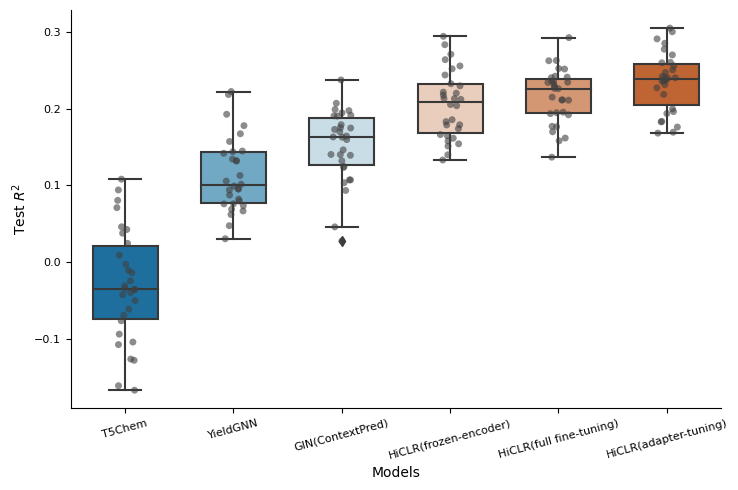

In [45]:
ax = sns.catplot(x="model", y="r2", data=df, palette=["#404040"], alpha=0.6, aspect=1.5)
ax.map(sns.boxplot, x="model", y="r2", data=df, palette=palettable.scientific.diverging.Vik_10.mpl_colors[2:], saturation=1.0, width=0.6)
# sns.catplot(x="model", y="r2", data=df, kind="box")

ax.set_axis_labels("Models", "Test ${R^2}$")
ax.tick_params(axis='x', labelsize=8, rotation=15)  
ax.tick_params(axis='y', labelsize=8)

plt.tight_layout()
plt.savefig("./figures/yield_ax_r2_boxplot_v1.png", dpi=1000)

/data2/zhuyiheng/.conda/envs/metatrans/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  """Entry point for launching an IPython kernel.
/data2/zhuyiheng/.conda/envs/metatrans/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 
The palette list has fewer values (1) than needed (6) and will cycle, which may produce an uninterpretable plot.
  """Entry point for launching an IPython kernel.
/data2/zhuyiheng/.conda/envs/metatrans/lib/python3.7/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


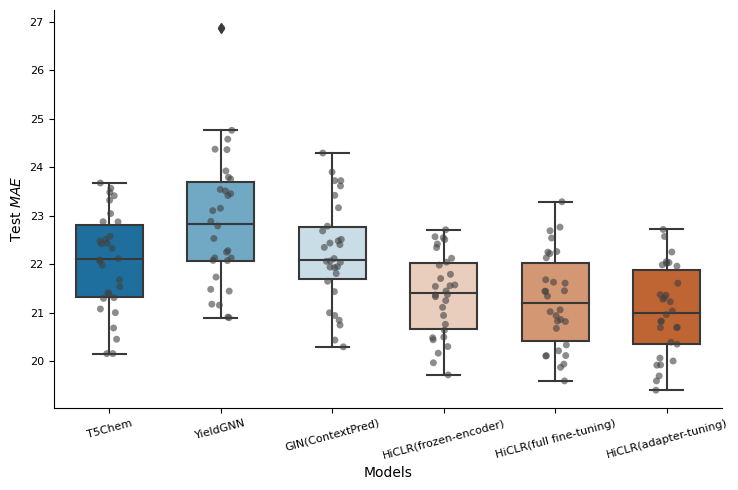

In [50]:
ax = sns.catplot(x="model", y="mae", data=df, palette=["#404040"], alpha=0.6, aspect=1.5)
ax.map(sns.boxplot, x="model", y="mae", data=df, palette=palettable.scientific.diverging.Vik_10.mpl_colors[2:], saturation=1.0, width=0.6)
# sns.catplot(x="model", y="r2", data=df, kind="box")

ax.set_axis_labels("Models", "Test $MAE$")
ax.tick_params(axis='x', labelsize=8, rotation=15)  
ax.tick_params(axis='y', labelsize=8)

plt.tight_layout()
plt.savefig("./figures/yield_ax_mae_boxplot_v2.png", dpi=1000)

### product distribution

In [163]:
data_name = "az"
az = pd.read_csv(f"./data/yield/buchward/{data_name}/processed.csv")
rxns = az["reactants>reagents>production"].tolist()
yields = az["class"].tolist()
prods = set([rxn.split(">")[-1] for rxn in rxns])
az_prods_fp = []
for prod in prods:
    az_prods_fp.append(list(AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(prod),2,512).ToBitString()))

In [164]:
data_name = "dy"
az = pd.read_csv(f"./data/yield/buchward/{data_name}/processed.csv")
rxns = az["reactants>reagents>production"].tolist()
yields = az["class"].tolist()
prods = set([rxn.split(">")[-1] for rxn in rxns])
dy_prods_fp = []
for prod in prods:
    dy_prods_fp.append(list(AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(prod),2,512).ToBitString()))

In [165]:
az_prods_fp = torch.tensor(torch.tensor(np.array(az_prods_fp, dtype=int)))
dy_prods_fp = torch.tensor(torch.tensor(np.array(dy_prods_fp, dtype=int)))
fp = torch.cat([az_prods_fp, dy_prods_fp],dim=0)
x_final = fit(fp)
x_final.shape

/data2/zhuyiheng/.conda/envs/metatrans/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.
/data2/zhuyiheng/.conda/envs/metatrans/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  
/data2/zhuyiheng/.conda/envs/metatrans/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/data2/zhuyiheng/.conda/envs/metatrans/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have 

(459, 2)


(459, 2)

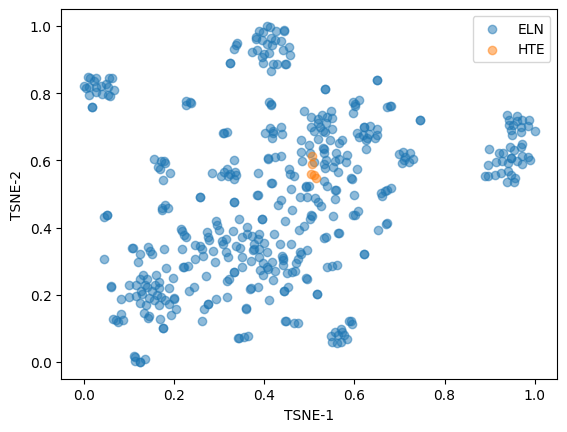

In [168]:
plt.scatter(x=x_final[:len(az_prods_fp), 0], y=x_final[:len(az_prods_fp), 1],label="ELN",alpha=0.5)
plt.scatter(x=x_final[len(az_prods_fp):, 0], y=x_final[len(az_prods_fp):, 1],label="HTE",alpha=0.5)
plt.xlabel("TSNE-1")
plt.ylabel("TSNE-2")
plt.legend()